# Control de Calidad

Para llevar a cabo actividades de control de calidad, es importante comprender qué es la calidad, su importancia y, además, la relación entre los clientes y la calidad.

In [1]:
import os

try:
  os.chdir('../Python/QCKentei4')
except:
  pass

path = os.getcwd()
path

'/Users/takanohiroshi/Library/CloudStorage/OneDrive-YokohamaInternationalExchangeAssociation/Python/QCKentei4'

In [2]:
def ensure_and_move_to_folder(folder_name):
  current_dir = os.getcwd()
  target_path = os.path.join(current_dir, folder_name)

  if not os.path.exists(target_path):
    os.makedirs(target_path)
    print(f"Folder '{folder_name}' created successfully.")
  else:
    print(f"Folder '{folder_name}' already exists.")

  #os.chdir(target_path)

In [3]:
folder_name = 'Data4'
ensure_and_move_to_folder(folder_name)

Folder 'Data4' already exists.


In [4]:
from IPython.display import display
from PIL import Image

## 01-01 La calidad y su importancia

### 1. ¿Qué es la calidad?

La **calidad** se refiere generalmente a la cualidad de los productos o servicios.
Es el grado en que las características inherentes (función, rendimiento, operatividad, etc.) de estos productos o servicios satisfacen las necesidades de las personas que los utilizan (los clientes).

* Utilidad, Usabilidad
* Seguridad
* Espacio: forma, tamaño, peso
* Tiempo, Tasa de actividad / Tiempo, índice de operatividad
* Economicidad, Rentabilidad

### 2. La importancia de la calidad

## 01-02 El enfoque de prioridad en la calidad

### 1. Market in / Product out

### 2. QCD

* Quality
* Cost
* Delivery
* Safety (SQCD)

### 3. El enfque de prioridad en la calidad

## 01-03 ¿Qué es el Control de Calidad?

### 1. ¿Qué es el Control de calidad?

El **Control de Calidad** es el conjunto de actividades sistemáticas que una empresa lleva a cabo de forma organizada para poder ofrecer productos y servicios con una calidad que satisfaga a los clientes, en el momento y al precio adecuados.

### 2. Actividades de Conrol de Calidad

**4M**
* Man
* Machine
* Material
* Method

Los cuatro factores que causan la variabilidad de la calidad


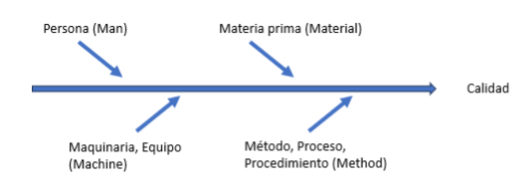

In [5]:
print("Los cuatro factores que causan la variabilidad de la calidad")
img = Image.open('./Data4/4M.png')
display(img)

## 01-04 Satisfacción del cliente y Calidad esperada

### 1. Satisfacción del cliente

**CS** Customer Satisfaction

* Indice de satisfacción del cliente / Nivel de satisfacción del cliente
* Encuesta de satisfacción del cliente
* El siguiente proceso es el cliente / El cliente es el siguinte proceso.

### 2. Calidad esperada / Calidad objetivo / Calidad deseada

**VOC** Voice Of Customer


## 01-05 Problemas y Desafíos

Un **problema** se refiere a la diferencia (brecha) entre el estado ideal (la situación deseada) y el estado actual.

Un **desafio** (o tarea pendiente) se refiere a la diferencia (brecha) entre el estado futuro deseado (la situación ideal a la que se aspira) y el estado actual.

Problema y Desafio


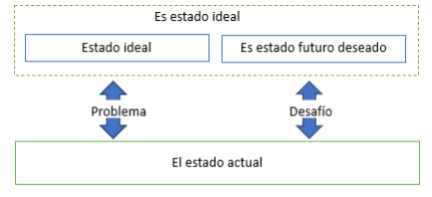

In [6]:
print("Problema y Desafio")
img = Image.open('./Data4/Problema_Desafio.png')
display(img)

## 01-06 Quejas / Reclamaciones

Una **queja** (o reclamación) es la insatisfacción que un cliente siente con respecto a un producto o servicio, debido a defectos o deficiencias, entre otros motivos.

Además, entre esasa quejas, aquellas en las que el cliente realiza una solicitud específica como reparación, reemplazo, descuento, reembolso, cancelación de contrato o compensación por daños, se denominan **reclamaciones**

* Actividades de prevención de recurrencia / Actividades para evitar la repetición
* Gestión de quejas /Tramitación de quejas / Resolución de quejas
* Gestión de reclamaciones / Tramitación de reclamaciones / Resolución de reclamaciones


In [14]:
import pandas as pd
import numpy as np
import polars as pl
import gspread 
from google.oauth2.service_account import Credentials

# 認証情報の設定
SERVICE_ACCOUNT_FILE = "my-project-vscode-452201-249bdb033f8c.json"  # JSONファイルのパス
SCOPES = ["https://www.googleapis.com/auth/spreadsheets"]

credentials = Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
client = gspread.authorize(credentials)

# スプレッドシートを開く（URLまたはスプレッドシートIDを使用）
SPREADSHEET_ID = "1RkO0VL4WR6cbPBfBEjz693Lo4SdUAoSvRHV491ggXTo"

sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet6") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()

cols = len(list_of_lists[0])
columns = np.arange(1,cols)

index = [row[0] for row in list_of_lists[1:]]
values = [row[1:] for row in list_of_lists[1:]]

df = pd.DataFrame(values, index=index, columns=columns)

df.index_name = list_of_lists[0][0]
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.astype('float')
df

,1,2,3,4,5,6,7,8,9
A,60.0,50.0,51.0,42.0,55.0,46.0,49.0,52.0,43.0
B,40.0,76.0,48.0,64.0,59.0,63.0,73.0,56.0,NaN


In [8]:
# NumPy 配列に変換（object型）
arr = np.array(list_of_lists, dtype=object)

# ブランク（空文字・空白）を np.nan に置換
arr_cleaned = np.array([[np.nan if str(cell).strip() == '' else cell for cell in row] for row in arr], dtype=object)

# 1列目をカラム名にする（縦方向）
column_names = arr_cleaned[:, 0].tolist()  # ['樹脂材料', 'A', 'B']

# 残りの部分をデータ行にする（縦列 → 横行に転置）
data_values = arr_cleaned[:, 1:]  # (3行 x 9列)
data_rows = data_values.T.tolist()  # (9行 x 3列)

# Polars データフレーム化
df = pl.DataFrame(data_rows, schema=column_names)

# A列とB列を float に変換（NaNも扱えるように strict=False）
df = df.with_columns([
    pl.col("A").cast(pl.Float64, strict=False),
    pl.col("B").cast(pl.Float64, strict=False)
])

print(df)

shape: (9, 3)
┌──────────┬──────┬──────┐
│ 樹脂材料 ┆ A    ┆ B    │
│ ---      ┆ ---  ┆ ---  │
│ f64      ┆ f64  ┆ f64  │
╞══════════╪══════╪══════╡
│ NaN      ┆ 60.0 ┆ 40.0 │
│ NaN      ┆ 50.0 ┆ 76.0 │
│ NaN      ┆ 51.0 ┆ 48.0 │
│ NaN      ┆ 42.0 ┆ 64.0 │
│ NaN      ┆ 55.0 ┆ 59.0 │
│ NaN      ┆ 46.0 ┆ 63.0 │
│ NaN      ┆ 49.0 ┆ 73.0 │
│ NaN      ┆ 52.0 ┆ 56.0 │
│ NaN      ┆ 43.0 ┆ NaN  │
└──────────┴──────┴──────┘


/Users/takanohiroshi/.pyenv/versions/3.10.5/lib/python3.10/functools.py:889: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  return dispatch(args[0].__class__)(*args, **kw)


In [9]:
notebook_name = 'QCKentei4-1.ipynb'
notebook_name_html = notebook_name.replace(".ipynb",".html")

!jupyter nbconvert --to html {notebook_name}

[NbConvertApp] Converting notebook QCKentei4-1.ipynb to html
[NbConvertApp] Writing 763486 bytes to QCKentei4-1.html


In [10]:
from IPython.display import display
from PIL import Image
import gdown
import re

def get_file_id(url,out):
    # 正規表現でファイルIDを抽出
    match = re.search(r'/d/([a-zA-Z0-9_-]+)', url)

    if match:
        file_id = match.group(1)
        print("ファイルID:", file_id)
    else:
        print("ファイルIDが見つかりませんでした。")

    url = f"https://drive.google.com/uc?id={file_id}"

    output = out

    gdown.download(url, output, quiet=False)

    img = Image.open(out)
    display(img)


ファイルID: 1X_EqMhvlS0Y4ei_N12qhtqvp5fw0qgRZ


Downloading...
From: https://drive.google.com/uc?id=1X_EqMhvlS0Y4ei_N12qhtqvp5fw0qgRZ
To: /Users/takanohiroshi/Library/CloudStorage/OneDrive-YokohamaInternationalExchangeAssociation/Python/QCKentei4/Data4/4M.png
100%|██████████| 19.6k/19.6k [00:00<00:00, 10.4MB/s]


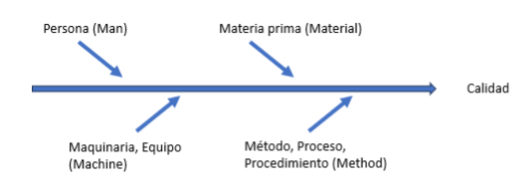

In [11]:
url= 'https://drive.google.com/file/d/1X_EqMhvlS0Y4ei_N12qhtqvp5fw0qgRZ/view?usp=drive_link'
out = './Data4/4M.png'
get_file_id(url,out)

ファイルID: 1xCf39Su3abGxobFacIbuXGnkvWwi9EcX


Downloading...
From: https://drive.google.com/uc?id=1xCf39Su3abGxobFacIbuXGnkvWwi9EcX
To: /Users/takanohiroshi/Library/CloudStorage/OneDrive-YokohamaInternationalExchangeAssociation/Python/QCKentei4/Data4/Problema_Desafio.png
100%|██████████| 19.5k/19.5k [00:00<00:00, 3.27MB/s]


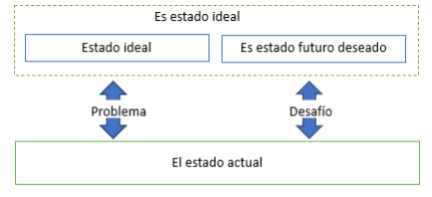

In [12]:
url= 'https://drive.google.com/file/d/1xCf39Su3abGxobFacIbuXGnkvWwi9EcX/view?usp=drive_link'
out = './Data4/Problema_Desafio.png'
get_file_id(url,out)